# STATS 517 PROJECT - 1


# Question 2: Predicting Income > $50k or not


This study focuses on the US Adult Census dataset; a repository of 32,561 entires carefully extracted from the 1994 US Census database. We would like to determine if an individual has a salary greater than or less than $50,000 annually based on the variables provided.

Present useful graphics to understand and/or reveal sensible info about the data set. Develop feasible models and compare their predictive accuracies and performance as a whole. Discuss the pros and cons of these models. Summarize and critique your modeling and findings.

The data can be retrieved as follows:

In [141]:
#Importing the dataset and viewing the content of the file

import pandas as pd
adult = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/adult.csv")

adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Nominal Attributes

### Workclass:

Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked Without-pay, Never-worked.

### Education:

Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

### Marital-status:

Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

### Occupation:

Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

### Relationship:

Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

### Race: Descriptions of an individual's race

White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

### Sex:

Male, Female

### Native-country:

United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hongkong, Holand-Netherlands.

### Continuous Attributes


age 
fnlwgt 
education-num 
capital-gain 
capital-loss 
hours-per-week 

### SOLUTION

To start with, we need the builtin packages like pandas, numpy, random, matplotlib, seaborn to compute mathematical functions and to plot the graphs for the given data. 

### Data Modeling

In [144]:
import seaborn as sns
import pandas as pd
adult.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


From the given dataset it is understood that the column 'salary' is the target variable. Our goal is to predict whether salary of a person is greater than or less than 50k.


## Visualization of Given Data

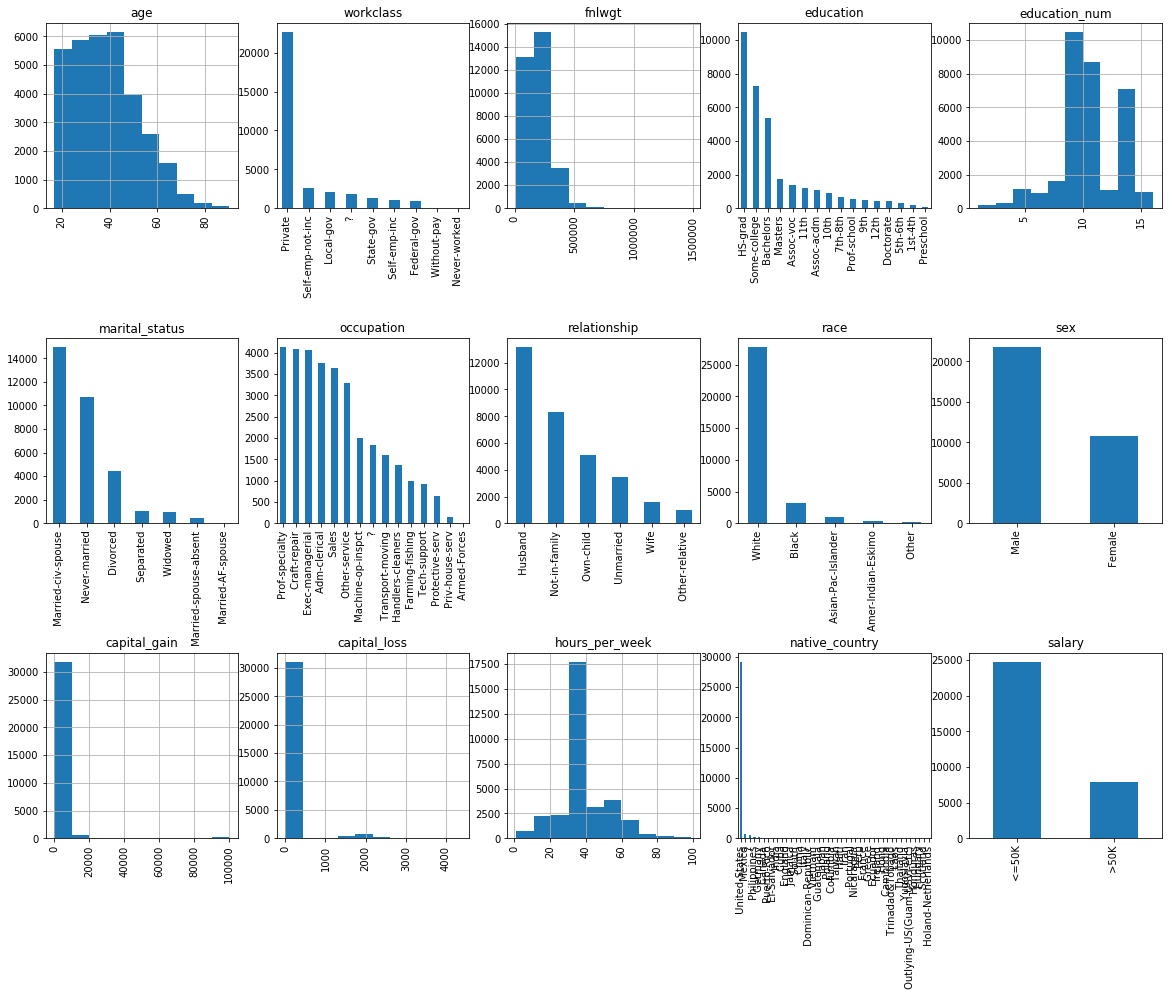

In [145]:
import numpy as np
fig = plt.figure(figsize=(20,15))
cols = 5
rows = np.math.ceil(float(adult.shape[1]) / cols)
for i, column in enumerate(adult.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if adult.dtypes[column] == np.object:
        adult[column].value_counts().plot(kind="bar", axes=ax)
    else:
        adult[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

## Data Preparation

In this dataset when we closely observe, there are a few values which are missing and filled with '?' value. In order to get better accuracy rate and outcome, we need to fill the missing values. 

In [128]:
#Identifying the columns with '?'

for value in ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'salary']:
    print (value ,"has", sum(adult[value] == ' ?'))
    

    
    

workclass has 1836
education has 0
marital_status has 0
occupation has 1843
relationship has 0
race has 0
sex has 0
native_country has 583
salary has 0


It is observed that the columns 'workclass', 'occupation' and 'native_country' has many missing values. In order to fill those missing values, we can replcae the missing values with the most repeating value in that column.

In [129]:
print (adult["workclass"].value_counts())

print(adult["occupation"].value_counts())
print(adult["native_country"].value_counts())



 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                    

From the dataset it is observed that:

Workclass has the value 'private' as most recurring value.

Occupation has the value 'Prof-specialty' as most recurring value.

Workclass has the value 'United-States' as most recurring value.


#### Therefore, we can replace these values in the columns where we have the missing data '?'



In [130]:
overwrite = {"workclass": {" ?": "Private"}, "occupation": {" ?": "Prof-specialty"}, "native_country": {" ?": "United-States"}}
adult.replace(overwrite, inplace = True)
adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Now the missing fields are filled with the most recurring value of that corresponding column.

Since the dataset has both categorical as well as continuous values, it is not feasible to obtain the exact results. Hence, we need to convert the categorical values into continuous values for performing further data analysis. These can be performed by inserting dummy variables using the pandas dataframes network.

In [131]:
adult = pd.get_dummies(adult, columns=["workclass", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country"])
print (adult.shape)
adult

(32561, 109)


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,native_country_United-States
0,39,77516,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,37,284582,14,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,49,160187,5,0,0,16,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,52,209642,9,0,0,45,>50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,31,45781,14,14084,0,50,>50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,42,159449,13,5178,0,40,>50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Here, all the categorical columns - workclass, education, marital_status, occupation, relationship, race, sex, native_country are now converted into continuous values. 

To proceed further, we are identifying the target and non-target attributes. We split the target and non-target into training and testing datasets.

The training dataset uses 75% and the testing dataset uses 25% of the real dataset. 



In [132]:
from sklearn.cross_validation import train_test_split
y_adult = pd.DataFrame([adult.salary]).T
y_adult["salary"] = y_adult["salary"].astype('category')
y_adult["salary_category"] = y_adult["salary"].cat.codes
y_adult = y_adult.select_dtypes(include=['int8','int64']).copy()
x_adult = pd.DataFrame(adult)
x_adult = adult.drop(['salary'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x_adult, y_adult, random_state = 0, test_size = 0.25)

## Analysing with various models:

## 1. Logistic Regression

The logistic regression is a regression analysis which is performed when the dependent varibale 
is in binary values. Logistic regression is used to describe data and to explain the
relationship between one dependent binary variable and one or more nominal, ordinal, interval
or ratio-level independent variables.

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_prediction = lr.predict(x_test)
lr_training = round(lr.score(x_train, y_train) * 100, 2)
print ('Training accuracy = {}'.format(lr_training))
lr_testing = round(accuracy_score(y_test, y_prediction) * 100, 2)
print ('Testing accuracy = {}'.format(lr_testing))
roc_auc_score(y_test, y_prediction)

C:\Users\Abhinav\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy = 79.77
Testing accuracy = 79.54


0.61290861133871011

## 2. K Nearest Neighbour

K nearest neighbors is a simple algorithm that stores all available cases and predict the numerical target based on a similarity measure like distance.

In [134]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train, y_train)

y_prediction_knn = knn.predict(x_test)

knn_training = round(knn.score(x_train, y_train) * 100, 2)
print ('Training accuracy = {}'.format(knn_training))
knn_testing = round(accuracy_score(y_test, y_prediction_knn) * 100, 2)
print ('Testing accuracy = {}'.format(knn_testing))
roc_auc_score(y_test, y_prediction_knn)

C:\Users\Abhinav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Training accuracy = 82.24
Testing accuracy = 77.94


0.61039610595046934

## 3. Support Vector Machines

Support vector machines are a set of supervised learning methods used for classification, regression and outliers detection.

In [135]:
from sklearn.svm import SVC, LinearSVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)

svc_accuracy_training = round(svc.score(x_train, y_train) * 100, 2)
print ('Training accuracy = {}'.format(svc_accuracy_training))
svc_accuracy_testing = round(accuracy_score(y_test, y_pred_svc) * 100, 2)
print ('Testing accuracy = {}'.format(svc_accuracy_testing))
roc_auc_score(y_test, y_pred_svc)

C:\Users\Abhinav\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy = 96.78
Testing accuracy = 75.2


0.51564490382594186

## 4. Naive Bayes

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of independence between every pair of features.

In [136]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_nb = nb.predict(x_test)
nb_accuracy_training = round(nb.score(x_train, y_train) * 100, 2)
print ('Training accuracy = {}'.format(nb_accuracy_training))
nb_accuracy_testing = round(accuracy_score(y_test, y_nb) * 100, 2)
print ('Testing accuracy = {}'.format(nb_accuracy_testing))
roc_auc_score(y_test, y_nb)

C:\Users\Abhinav\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy = 79.46
Testing accuracy = 79.5


0.63182696877843114

## 5. Decision Tree

A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility.

In [137]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_dr_prediction = dt.predict(x_test)
dt_accuracy_training = round(dt.score(x_train, y_train) * 100, 2)
print ('Training accuracy = {}'.format(dt_accuracy_training))
dt_accuracy_testing = round(accuracy_score(y_test, y_dr_prediction) * 100, 2)
print ('Testing accuracy = {}'.format(dt_accuracy_testing))
roc_auc_score(y_test, y_dr_prediction)

Training accuracy = 100.0
Testing accuracy = 81.92


0.75526335493217167

## 6. Random Forest


Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks

In [138]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(x_train, y_train)
y_rf_prediction = rf.predict(x_test)
rf_accuracy_training = round(rf.score(x_train, y_train) * 100, 2)
print ('Training accuracy = {}'.format(rf_accuracy_training))
rf_accuracy_testing = round(accuracy_score(y_test, y_rf_prediction) * 100, 2)
print ('Testing accuracy = {}'.format(rf_accuracy_testing))
roc_auc_score(y_test, y_rf_prediction)

C:\Users\Abhinav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Training accuracy = 100.0
Testing accuracy = 85.1


0.77252555021496438

## Analysis Based on Results

In [140]:
pd.DataFrame({'Types of Models':['Logical Regression', 'K Nearest Neighbour', 'Support Vector Machines', 
                                 'Naive Bayes', 'Decision Tree',' Random Forest'],
             'Training percentage' : [lr_training, knn_training, svc_accuracy_training, nb_accuracy_training, dt_accuracy_training, 
                                      rf_accuracy_training],
             'Testing percentage' : [lr_testing, knn_testing, svc_accuracy_testing, nb_accuracy_testing,
                                     dt_accuracy_testing, rf_accuracy_testing ]})
            

,Testing percentage,Training percentage,Types of Models
0,79.54,79.77,Logical Regression
1,77.94,82.24,K Nearest Neighbour
2,75.20,96.78,Support Vector Machines
3,79.50,79.46,Naive Bayes
4,81.92,100.00,Decision Tree
5,85.10,100.00,Random Forest


### From the above table it is clear that the best accuracy is obtained when the model is trained using the Random Forest method. It accounts for the best training as well as testing accuracies when compared with every other models. 

# Question 3: Purchasing Insurance

In [146]:
import pandas as pd
Caravan_train = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/Caravan_train.csv")
Caravan_train.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
2,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No
3,39,2,3,2,9,2,2,0,5,7,...,0,0,0,0,0,0,0,0,0,No
4,33,1,2,4,8,0,1,3,6,6,...,0,0,0,0,0,0,0,0,0,No


In [147]:

Caravan_unk = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/Caravan_unk.csv")
Caravan_unk.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,41,1,3,3,10,0,7,0,3,8,...,0,0,0,0,1,0,1,0,0,0
1,38,1,3,2,9,0,6,0,3,5,...,0,0,0,0,0,0,0,0,0,0
2,1,1,4,3,1,1,5,1,3,6,...,0,0,0,0,1,0,0,0,0,0
3,38,1,3,2,9,2,2,2,4,7,...,0,0,0,1,0,0,0,0,0,0
4,35,1,2,3,8,1,5,1,3,5,...,0,0,0,0,1,0,0,0,0,0


The data above contains 4630 real customer records. Each record consists of 86 variables, containing sociodemographic data (variables 1-43) and product ownership (variables 44-86). The sociodemographic data is derived from zip codes. All customers living in areas with the same zip code have the same sociodemographic attributes. Variable 86 (Purchase) indicates whether the customer purchased a caravan insurance policy.

Based on a direct marketing problem, the goal is to $predict$ and $interpret$ caravan insurance policy ownership on the basis of product usage and sociodemographic data supplied about the customer.

Consider using all prediction models you learned for the prediction task, suppose your supervisor has limited time and resources to only approach 50 customers. You are asked to recommend to your supervisor a subset of 50 customers from these 1064 customers in the Caravan_unk file who would most likely buy a caravan policy. Report just the row numbers of your selected 50 customers as they appear in the Caravan_unk file in increasing order (say, row #4, 7, 11, 59, 113, ...), then explain how you come up with this selected subset and your entire modeling process.

## SOLUTION

The main objective of this problem is to predict whether the customer will pruchase a policy or not. The target variable is 'purchase'. Also, we should sort and get the top 50 customers who will definitely get the policy.

### The packages which are required for this solution are:

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import os
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import Imputer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


###  Contents of the dataset:

In [148]:
# It is observed that the purchase variable is in type 'object'. 
#We need to convert this 'object' into 'category' inorder to obtain the binary values.
Caravan_train["Purchase"] = Caravan_train["Purchase"].astype('category')
Caravan_train["Purchase_category"] = Caravan_train["Purchase"].cat.codes
Caravan_new = Caravan_train.select_dtypes(include=['int8','int64']).copy()
Caravan_new.shape

(4630, 86)

## Preprocessing and partitioning

In [149]:
X_Caravan_new = Caravan_new.drop('Purchase_category', axis=1)
y_Caravan_new  = Caravan_new['Purchase_category']
print(X_Caravan_new.shape)
print(y_Caravan_new.shape)

(4630, 85)
(4630,)


## Splitting the data into training and testing:

In [89]:
X_train_Caravan_new, X_test_Caravan_new, y_train_Caravan_new, y_test_Caravan_new = train_test_split(X_Caravan_new, y_Caravan_new,
                                                random_state=0)
print(X_train_Caravan_new.shape)
print(X_test_Caravan_new.shape)
print(y_train_Caravan_new.shape)
print(y_test_Caravan_new.shape)

(3472, 85)
(1158, 85)
(3472,)
(1158,)


## Analysis with different models:

### 1. Logistic Regression

Logistic regression is done for 3 methods

In [173]:
lr = LogisticRegression()
lr.fit(X_train_Caravan_new, y_train_Caravan_new)
y_prediction_lr = lr.predict(X_test_Caravan_new)
lr_training = round(lr.score(X_train_Caravan_new, y_train_Caravan_new) * 100, 2)
print ('Training accuracy = {}'.format(lr_training))
lr_testing = round(accuracy_score(y_test_Caravan_new, y_prediction_lr) * 100, 2)
print ('Testing accuracy = {}'.format(lr_testing))
roc_auc_score(y_test_Caravan_new, y_prediction_lr)

Training accuracy = 93.98
Testing accuracy = 93.44


0.49953831948291783

In [91]:
lr1 = LogisticRegression(C=0.01).fit(X_train_Caravan_new, y_train_Caravan_new)
y_prediction_lr = lr1.predict(X_test_Caravan_new)
print("Training set score: {:.3f}".format(lr1.score(X_train_Caravan_new, y_train_Caravan_new)))
print("Test set score: {:.3f}".format(lr1.score(X_test_Caravan_new, y_test_Caravan_new)))
roc_auc_score(y_test_Caravan_new, y_prediction_lr)


Training set score: 0.940
Test set score: 0.935


0.5

In [92]:
lr100 = LogisticRegression(C=100).fit(X_train_Caravan_new, y_train_Caravan_new)
y_prediction_lr = lr100.predict(X_test_Caravan_new)
print("Training set score: {:.3f}".format(lr100.score(X_train_Caravan_new, y_train_Caravan_new)))
print("Test set score: {:.3f}".format(lr100.score(X_test_Caravan_new, y_test_Caravan_new)))
roc_auc_score(y_test_Caravan_new, y_prediction_lr)


Training set score: 0.940
Test set score: 0.934


0.49907663896583565

### 2. K Nearest Neighbors

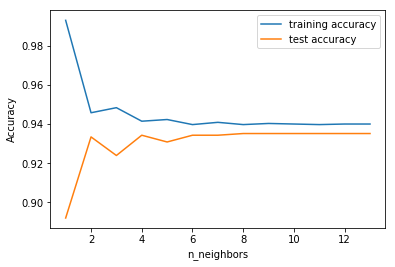

In [93]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 14
neighbors_settings = range(1, 14)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train_Caravan_new, y_train_Caravan_new)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train_Caravan_new, y_train_Caravan_new))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test_Caravan_new, y_test_Caravan_new))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

The training and the testing curve doesn't seem to meet at a point in the plot. Hence, it is not possible to obtain a sollution for a given range.

In [94]:
# For K = 5:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_Caravan_new, y_train_Caravan_new)

y_prediction_knn = knn.predict(X_test_Caravan_new)

knn_training = round(knn.score(X_train_Caravan_new, y_train_Caravan_new) * 100, 2)
print ('Training accuracy = {}'.format(knn_training))
knn_testing = round(accuracy_score(y_test_Caravan_new, y_prediction_knn) * 100, 2)
print ('Testing accuracy = {}'.format(knn_testing))
roc_auc_score(y_test_Caravan_new, y_prediction_knn)

Training accuracy = 94.24
Testing accuracy = 93.09


0.49769159741458913

In [95]:
# For K = 7:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train_Caravan_new, y_train_Caravan_new)

y_prediction_knn = knn.predict(X_test_Caravan_new)

knn_training = round(knn.score(X_train_Caravan_new, y_train_Caravan_new) * 100, 2)
print ('Training accuracy = {}'.format(knn_training))
knn_testing = round(accuracy_score(y_test_Caravan_new, y_prediction_knn) * 100, 2)
print ('Testing accuracy = {}'.format(knn_testing))
roc_auc_score(y_test_Caravan_new, y_prediction_knn)

Training accuracy = 94.1
Testing accuracy = 93.44


0.49953831948291783

In [96]:
# For K = 9:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train_Caravan_new, y_train_Caravan_new)

y_prediction_knn = knn.predict(X_test_Caravan_new)

knn_training = round(knn.score(X_train_Caravan_new, y_train_Caravan_new) * 100, 2)
print ('Training accuracy = {}'.format(knn_training))
knn_testing = round(accuracy_score(y_test_Caravan_new, y_prediction_knn) * 100, 2)
print ('Testing accuracy = {}'.format(knn_testing))
roc_auc_score(y_test_Caravan_new, y_prediction_knn)

Training accuracy = 94.04
Testing accuracy = 93.52


0.5

It is observed that for the K values 5, 7 and 9, the training values gradually decresases but the testing values increases in a smaller margin. Therefore, as the value of K increases, the testing accuracy also increases.

### 3. Support Vector Machine

In [97]:
svc = SVC()
svc.fit(X_train_Caravan_new, y_train_Caravan_new)
y_prediction_svc = svc.predict(X_test_Caravan_new)

svc_accuracy_training = round(svc.score(X_train_Caravan_new, y_train_Caravan_new) * 100, 2)
print ('Training accuracy = {}'.format(svc_accuracy_training))
svc_accuracy_testing = round(accuracy_score(y_test_Caravan_new, y_prediction_svc) * 100, 2)
print ('Testing accuracy = {}'.format(svc_accuracy_testing))
roc_auc_score(y_test_Caravan_new, y_prediction_svc)

Training accuracy = 94.07
Testing accuracy = 93.52


0.5

### 4. Naive Bayes

In [98]:
nb = GaussianNB()
nb.fit(X_train_Caravan_new, y_train_Caravan_new)
y_prediction_nb = nb.predict(X_test_Caravan_new)
nb_accuracy_training = round(nb.score(X_train_Caravan_new, y_train_Caravan_new) * 100, 2)
print ('Training accuracy = {}'.format(nb_accuracy_training))
nb_accuracy_testing = round(accuracy_score(y_test_Caravan_new, y_prediction_nb) * 100, 2)
print ('Testing accuracy = {}'.format(nb_accuracy_testing))
roc_auc_score(y_test_Caravan_new, y_prediction_nb)

Training accuracy = 14.66
Testing accuracy = 15.28


0.52847645429362877

### 5. Decision tree

Training accuracy = 99.31
Testing accuracy = 89.98


0.54312096029547552

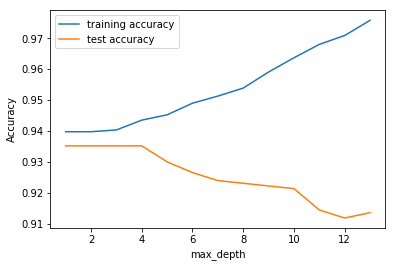

In [99]:

training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 14
max_depth_settings = range(1, 14)

for max_depth in max_depth_settings:
    # build the model
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train_Caravan_new, y_train_Caravan_new)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train_Caravan_new, y_train_Caravan_new))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test_Caravan_new, y_test_Caravan_new))
    
plt.plot(max_depth_settings, training_accuracy, label="training accuracy")
plt.plot(max_depth_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

dt = DecisionTreeClassifier()
dt.fit(X_train_Caravan_new, y_train_Caravan_new)
y_prediction_dt = dt.predict(X_test_Caravan_new)
dt_accuracy_training = round(dt.score(X_train_Caravan_new, y_train_Caravan_new) * 100, 2)
print ('Training accuracy = {}'.format(dt_accuracy_training))
dt_accuracy_testing = round(accuracy_score(y_test_Caravan_new, y_prediction_dt) * 100, 2)
print ('Testing accuracy = {}'.format(dt_accuracy_testing))
roc_auc_score(y_test_Caravan_new, y_prediction_dt)

### 6. Random Forest

In [102]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(X_train_Caravan_new, y_train_Caravan_new)
y_prediction_rf = rf.predict(X_test_Caravan_new)
rf_accuracy_training = round(rf.score(X_train_Caravan_new, y_train_Caravan_new) * 100, 2)
print ('Training accuracy = {}'.format(rf_accuracy_training))
rf_accuracy_testing = round(accuracy_score(y_test_Caravan_new, y_prediction_rf) * 100, 2)
print ('Testing accuracy = {}'.format(rf_accuracy_testing))
roc_auc_score(y_test_Caravan_new, y_prediction_rf)

Training accuracy = 99.28
Testing accuracy = 92.31


0.5059464450600184

### 7. Neural Networks

In [106]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_Caravan_new, y_train_Caravan_new)
y_prediction_mlp = mlp.predict(X_test_Caravan_new)
mlp_accuracy_training = round(mlp.score(X_train_Caravan_new, y_train_Caravan_new)*100,2)
print("Accuracy on training set: {:.2f}".format(mlp_accuracy_training))
mlp_accuracy_testing = round(mlp.score(X_test_Caravan_new, y_test_Caravan_new)*100,2)
print("Accuracy on test set: {:.2f}".format(mlp_accuracy_testing))
roc_auc_score(y_test_Caravan_new, y_prediction_mlp)

Accuracy on training set: 95.59
Accuracy on test set: 92.31


0.5059464450600184

In [139]:
pd.DataFrame({'Types of Models':['Logical Regression', 'K Nearest Neighbour', 'Support Vector Machines', 
                                 'Naive Bayes', 'Decision Tree',' Random Forest','Neural Networks'],
             'Training percentage' : [lr_training, knn_training, svc_accuracy_training, nb_accuracy_training, dt_accuracy_training, 
                                      rf_accuracy_training,mlp_accuracy_training],
             'Testing percentage' : [lr_testing, knn_testing, svc_accuracy_testing, nb_accuracy_testing,
                                     dt_accuracy_testing, rf_accuracy_testing, mlp_accuracy_testing ] })

,Testing percentage,Training percentage,Types of Models
0,79.54,79.77,Logical Regression
1,77.94,82.24,K Nearest Neighbour
2,75.20,96.78,Support Vector Machines
3,79.50,79.46,Naive Bayes
4,81.92,100.00,Decision Tree
5,85.10,100.00,Random Forest
6,92.31,95.59,Neural Networks


In [153]:
Caravan_unk = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/Caravan_unk.csv")
Caravan_unk.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,41,1,3,3,10,0,7,0,3,8,...,0,0,0,0,1,0,1,0,0,0
1,38,1,3,2,9,0,6,0,3,5,...,0,0,0,0,0,0,0,0,0,0
2,1,1,4,3,1,1,5,1,3,6,...,0,0,0,0,1,0,0,0,0,0
3,38,1,3,2,9,2,2,2,4,7,...,0,0,0,1,0,0,0,0,0,0
4,35,1,2,3,8,1,5,1,3,5,...,0,0,0,0,1,0,0,0,0,0


In the given dataset, the 'y' variable has binary values. Whenever the 'y' variable has binary values, the logistic regression method will give the most feasible outcome or the accuracy. 

### Sorting out the top 50 customers:

In [175]:
val = mlp.predict_proba(Caravan_unk)[:,1]
val

array([ 0.00042373,  0.04658561,  0.27476125, ...,  0.04889157,
        0.00048711,  0.01499279])

In [188]:
val = pd.DataFrame(val)
val.columns = val.columns +1
val.index = val.index 
new = pd.merge(Caravan_unk, val, left_index=True, right_index=True)
new.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,1
0,41,1,3,3,10,0,7,0,3,8,...,0,0,0,1,0,1,0,0,0,0.000424
1,38,1,3,2,9,0,6,0,3,5,...,0,0,0,0,0,0,0,0,0,0.046586
2,1,1,4,3,1,1,5,1,3,6,...,0,0,0,1,0,0,0,0,0,0.274761
3,38,1,3,2,9,2,2,2,4,7,...,0,0,1,0,0,0,0,0,0,0.105123
4,35,1,2,3,8,1,5,1,3,5,...,0,0,0,1,0,0,0,0,0,0.115174


In [190]:
import pandas as pd
sort_val = new.sort_values(by=[1],ascending=False)
sort_val_prob = sort_val[1]
sort_val_prob.head(n=50)

738     0.812390
354     0.776479
29      0.747525
1004    0.728286
703     0.688390
936     0.658762
734     0.658077
56      0.656497
576     0.606032
457     0.600505
527     0.597834
123     0.591275
454     0.570995
217     0.535539
975     0.505447
525     0.483160
651     0.473653
41      0.465658
520     0.462346
402     0.458394
31      0.426791
420     0.420183
16      0.418363
15      0.417624
415     0.416477
687     0.408796
486     0.404116
630     0.401240
644     0.400835
39      0.396319
1042    0.392692
852     0.389658
952     0.385443
366     0.385027
467     0.381514
428     0.375032
640     0.374899
106     0.373502
868     0.371214
639     0.363181
150     0.358365
485     0.352315
232     0.347118
254     0.341263
765     0.335858
65      0.334636
113     0.329766
717     0.327926
912     0.327726
865     0.319843
Name: 1, dtype: float64